In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


fir = pd.read_csv('Feature_FIR.csv')

fir.columns =['ESH', 'MAD', 'SKEW','KURT','VLF','LF','HF','Label']
fir_feat = fir.drop('Label',1)
fir_feat['VLF'] = fir_feat['VLF'].fillna(fir_feat['VLF'].mean())
fir_label = fir['Label']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
fir.head()

,ESH,MAD,SKEW,KURT,VLF,LF,HF,Label
0,12.667555,0.107143,3.032131,-1.842253,0.000942,0.000015,2.283342e-07,0
1,12.674413,0.093142,3.130547,-1.677857,0.002894,0.000640,3.742241e-06,0
2,12.668663,0.110107,1.661173,-1.218015,0.003227,0.000078,1.235755e-06,0
3,12.673751,0.124478,1.435115,-1.247265,0.000341,0.000006,9.874501e-08,0
4,12.683872,0.127384,1.401233,-1.311922,0.004567,0.000138,7.953321e-07,0


# **Feature Selection : Pearson Correlation**

## *Denoising FIR*

In [ ]:
corr_features = correlation(fir_feat,0.5) #0.5 or 0.8
len(set(corr_features))
print('Correlated features: ', len(set(corr_features)))
print('Correlated features are: ', corr_features)

Correlated features:  4
Correlated features are:  {'HF', 'KURT', 'LF', 'SKEW'}


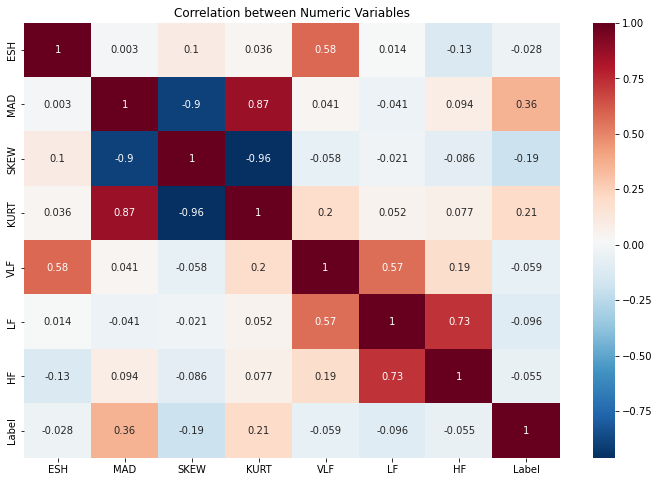

In [ ]:
corr_fir = fir.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_fir, cmap="RdBu_r",annot=True)

plt.title('Correlation between Numeric Variables')
plt.show()